# Kickstarter Success Predictions

This notebook is intended to provide guidance for anyone wishing to launch a Kickstarter campaign. It evaluates which fiscal quarter has the highest success rates for campaigns in the United States, as well as the average time it took for a campaign to be fully funded (duration).

The dataset used was found on Kaggle: https://www.kaggle.com/yashkantharia/kickstarter-campaigns/version/1

In [11]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import os
import csv

# Establish connection to database
connection = sqlite3.connect("kickstarter.db")

# Read the CSV file
kickstarter = pd.read_csv("Kickstarter_projects_Feb19.csv")
kickstarter

# Push data to kickstarter.db
kickstarter.to_sql('kickstarter', connection, if_exists='replace')

In [22]:
# Retrieve data from datbase
pd.read_sql_query("""
    SELECT * FROM kickstarter
    WHERE status = 'successful' AND country = 'US'
    ORDER BY duration
""", connection)


,index,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,...,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,273,931747986,CXL - Feature Film - The 24 Hour Kickstarter. ...,USD,film & video,Narrative Film,2011-07-06 17:30:17,2011-07-07 17:30:17,1.0,5000.0,...,CA,US,23,12,successful,7,7,Q3,Q3,5018.05
1,4628,1465935718,Minnesota special election maps,USD,journalism,Web,2018-02-12 18:46:21,2018-02-14 02:00:00,1.0,25.0,...,MN,US,19,4,successful,2,2,Q1,Q1,292.57
2,6310,43736794,Another Fucking Warhol Production,USD,dance,Performances,2017-05-10 16:15:14,2017-05-11 17:00:00,1.0,5000.0,...,NY,US,19,4,successful,5,5,Q2,Q2,7740.26
3,11865,1489259793,A Petersen Games Roodmas,USD,art,Sculpture,2018-04-01 02:43:56,2018-04-02 05:01:00,1.0,350.0,...,TX,US,12,4,successful,4,4,Q2,Q2,3638.07
4,19915,442381384,Fear and Football in Las Vegas,USD,journalism,Print,2014-07-07 19:46:19,2014-07-09 03:59:00,1.0,100.0,...,NV,US,16,6,successful,7,7,Q3,Q3,145.00
5,22172,1465935718,Minnesota special election maps,USD,journalism,Web,2018-02-12 18:46:21,2018-02-14 02:00:00,1.0,25.0,...,MN,US,19,4,successful,2,2,Q1,Q1,292.57
6,23038,1489259793,A Petersen Games Roodmas,USD,art,Sculpture,2018-04-01 02:43:56,2018-04-02 05:01:00,1.0,350.0,...,TX,US,12,4,successful,4,4,Q2,Q2,3638.07
7,23423,1795728690,A Labradoodle Photobook,USD,photography,Photobooks,2016-11-10 22:52:43,2016-11-11 22:52:43,1.0,5.0,...,NY,US,8,3,successful,11,11,Q4,Q4,18.00
8,29517,1453213708,Spirituality From Absolute Zero,USD,publishing,Nonfiction,2014-09-20 04:10:31,2014-09-21 04:10:31,1.0,1.0,...,CA,US,22,4,successful,9,9,Q3,Q3,1.00
9,34105,1175306310,BjÃÂ¶rk Swan Dress T-Shirt,USD,art,Conceptual Art,2012-02-16 16:56:27,2012-02-17 17:00:00,1.0,180.0,...,NY,US,23,4,successful,2,2,Q1,Q1,472.00


# Cut Down Dataset More
Deleted all categories that weren't NAME, DURATION, GOAL_USD, STATE, COUNTRY, STATUS, START_Q, END_Q, USD_PLEDGED

In [30]:
pd.read_sql_query("""
    SELECT name, duration, goal_usd, state, country, status, start_Q, end_Q, usd_pledged FROM kickstarter
    WHERE status = 'successful' AND country = 'US'
    ORDER BY end_Q
    ASC;
""", connection)

,name,duration,goal_usd,state,country,status,start_Q,end_Q,usd_pledged
0,"Qto-X, a Tiny Lantern",60.0,30000.0,MI,US,successful,Q4,Q1,40368.00
1,"Aaron McDonnell EP ""Follow""",30.0,7500.0,WA,US,successful,Q1,Q1,7770.00
2,Bunny Face LTD - Issue 1,9.0,100.0,CT,US,successful,Q1,Q1,308.00
3,The Madeline Deveroux Project,30.0,5000.0,AZ,US,successful,Q4,Q1,5000.00
4,Mancer,30.0,1000.0,MO,US,successful,Q1,Q1,7009.00
5,Pyromance Glass,30.0,700.0,TX,US,successful,Q1,Q1,16666.00
6,Buckshot Words: By John Morello with art by Ki...,30.0,15900.0,MA,US,successful,Q1,Q1,18650.00
7,Make 100 : The Apollo 11 Lunar Landing Chart,30.0,1400.0,OH,US,successful,Q1,Q1,32064.00
8,The BTunes: Plug in Pure Wireless HiFi Sound,44.0,40000.0,CA,US,successful,Q4,Q1,50237.00
9,For Journalism,45.0,32000.0,FL,US,successful,Q1,Q1,34358.97


### Which Quarter Yielded the Most Successful Campaigns (using USD)?

In [41]:
# pull out only name, status, end_Q
pd.read_sql_query("""
    SELECT name AS "Name", status AS "Status", start_Q AS "Quarter Started", end_Q AS "Quarter Ended" FROM kickstarter
    WHERE status = 'successful' AND country = 'US'
    ORDER BY end_Q
    ASC;
""", connection)

,Name,Status,Quarter Started,Quarter Ended
0,"Qto-X, a Tiny Lantern",successful,Q4,Q1
1,"Aaron McDonnell EP ""Follow""",successful,Q1,Q1
2,Bunny Face LTD - Issue 1,successful,Q1,Q1
3,The Madeline Deveroux Project,successful,Q4,Q1
4,Mancer,successful,Q1,Q1
5,Pyromance Glass,successful,Q1,Q1
6,Buckshot Words: By John Morello with art by Ki...,successful,Q1,Q1
7,Make 100 : The Apollo 11 Lunar Landing Chart,successful,Q1,Q1
8,The BTunes: Plug in Pure Wireless HiFi Sound,successful,Q4,Q1
9,For Journalism,successful,Q1,Q1


Using this data, I wanted to display which fiscal quarter held the most successful Kickstarter campaigns. To do so, I first wanted to find the specific number of successful campaigns per quarter.

In [72]:
pd.read_sql_query("""
    SELECT end_Q AS "Quarter", count(end_Q) AS "Number of Successful Campaigns" FROM kickstarter
    GROUP BY end_Q
""", connection)



,Quarter,Number of Successful Campaigns
0,Q1,40722
1,Q2,48942
2,Q3,51237
3,Q4,51647


Once I knew what numbers I was looking at, I was ready to plot my findings.

In [42]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib
%matplotlib inline

  Found existing installation: pip 19.0.3
    Uninstalling pip-19.0.3:
      Successfully uninstalled pip-19.0.3


In [23]:
# Bar chart of quarters with successful campaigns

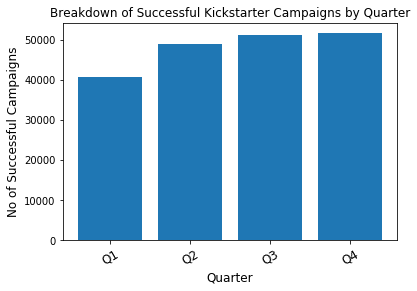

In [93]:
import matplotlib.pyplot as plt
import numpy as np

label = ['Q1', 'Q2', 'Q3', 'Q4']
index = np.arange(len(label))
no_campaigns = [
    40722,
    48942,
    51237,
    51647
    ]

index = np.arange(len(label))
plt.bar(index, no_campaigns)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('No of Successful Campaigns', fontsize=12)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title('Breakdown of Successful Kickstarter Campaigns by Quarter')

plt.show()